In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv('FinalBalancedDataset.csv')

In [3]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
data

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [5]:
data['tweet'] = data['tweet'].str.lower()

In [6]:
def text_cleaning(text):
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    text = text.split()
    text = ' '.join(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    tokens = [i for i in tokens if i not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(i) for i in tokens]
    
    cleaned_text = " ".join(tokens)
    return cleaned_text

In [7]:
data['cleaned_tweet'] = data['tweet'].apply(text_cleaning)

Training and Evaluating DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6472
           1       0.94      0.91      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



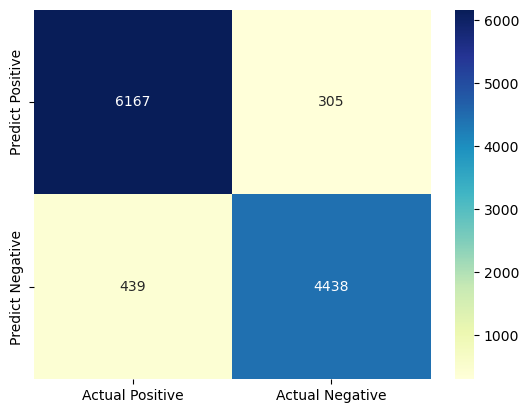

ROC-AUC Score: 0.9314063698757038


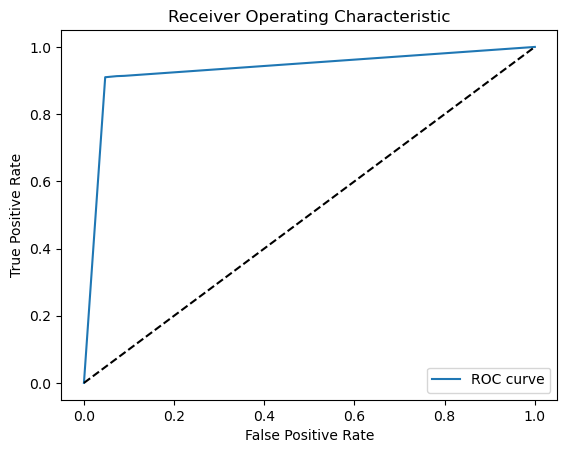

Training and Evaluating KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      6472
           1       0.95      0.79      0.87      4877

    accuracy                           0.89     11349
   macro avg       0.91      0.88      0.89     11349
weighted avg       0.90      0.89      0.89     11349



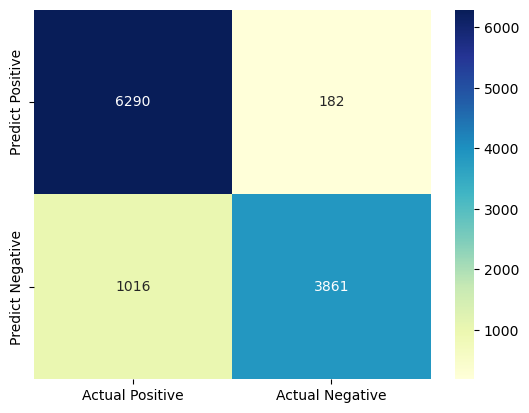

ROC-AUC Score: 0.9355623935969473


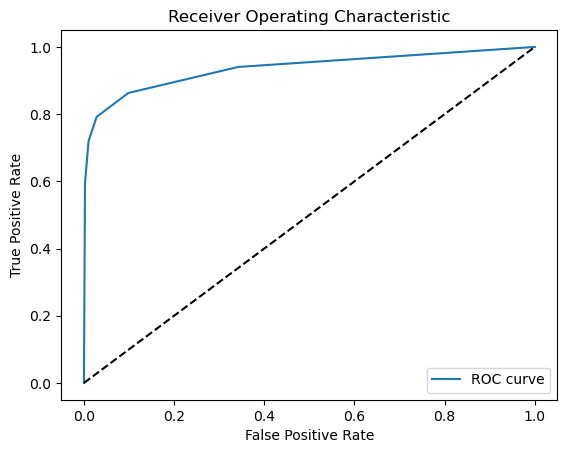

Training and Evaluating MultinomialNB
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6472
           1       0.88      0.93      0.91      4877

    accuracy                           0.92     11349
   macro avg       0.91      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349



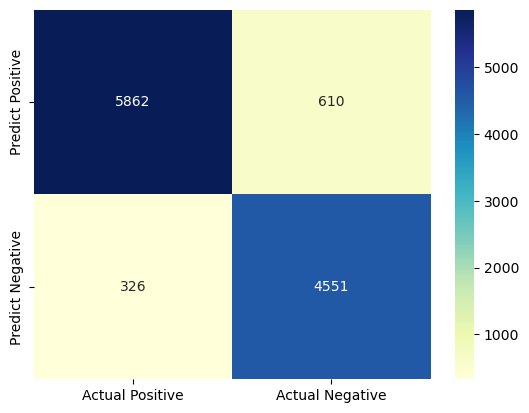

ROC-AUC Score: 0.9723092589443196


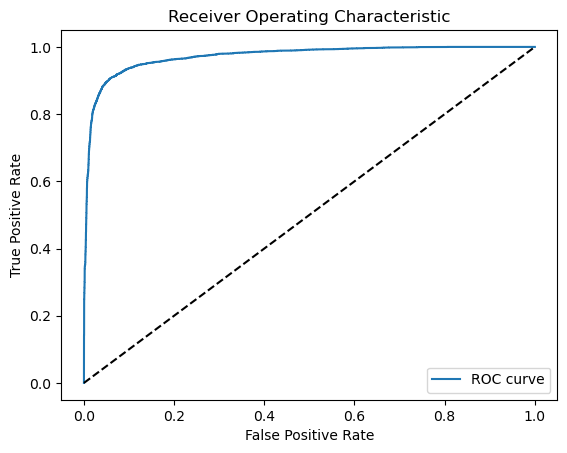

Training and Evaluating RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6472
           1       0.94      0.92      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.94      0.93      0.94     11349
weighted avg       0.94      0.94      0.94     11349



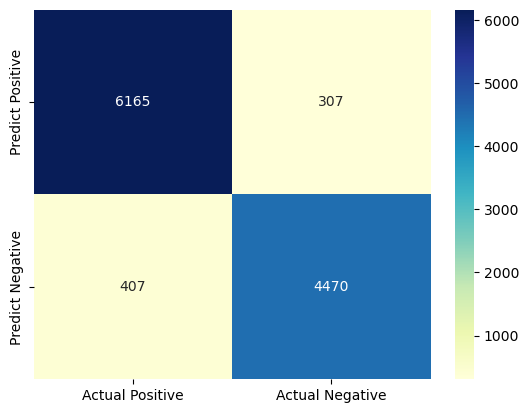

ROC-AUC Score: 0.9817229114333746


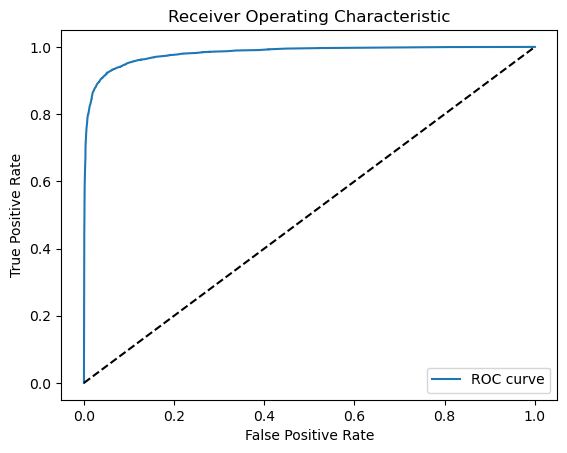

Training and Evaluating SVC


In [ ]:
def train_evaluate_plot(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    
    cm=confusion_matrix(y_test, predictions)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()
    
    probs = classifier.predict_proba(X_test)[:, 1]  
    print("ROC-AUC Score:", roc_auc_score(y_test, probs))
    
    fpr, tpr, threshold = roc_curve(y_test, probs)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess curve
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(data['cleaned_tweet'])

# Split data into training and testing sets
X = count_matrix  # Features (Bag of Words representation)
y = data['Toxicity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = [DecisionTreeClassifier(), KNeighborsClassifier(), MultinomialNB(), RandomForestClassifier()]

# Train, Evaluate, and Plot results for each classifier
for classifier in classifiers:
    print("Training and Evaluating", classifier.__class__.__name__)
    train_evaluate_plot(classifier, X_train, X_test, y_train, y_test)



Training and Evaluating DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6472
           1       0.93      0.92      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



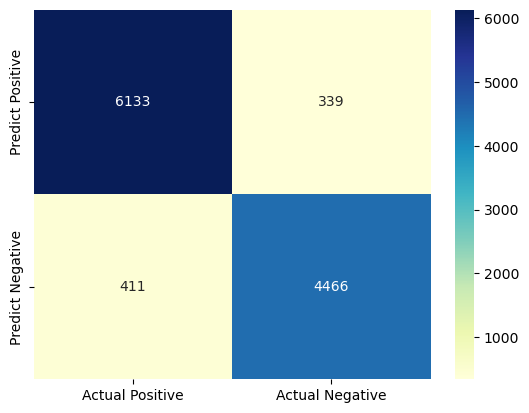

ROC-AUC Score: 0.9314871265770842


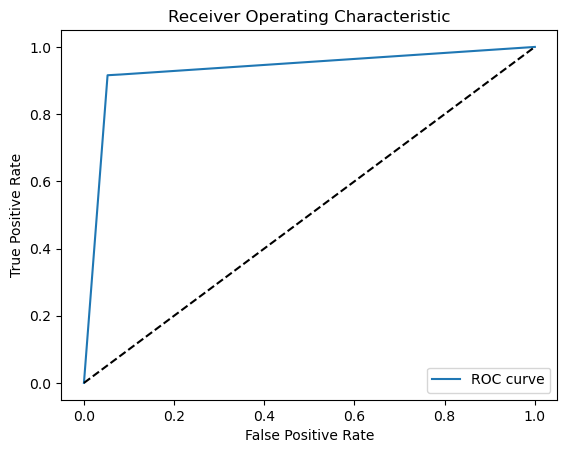

Training and Evaluating RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6472
           1       0.94      0.92      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.94      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349



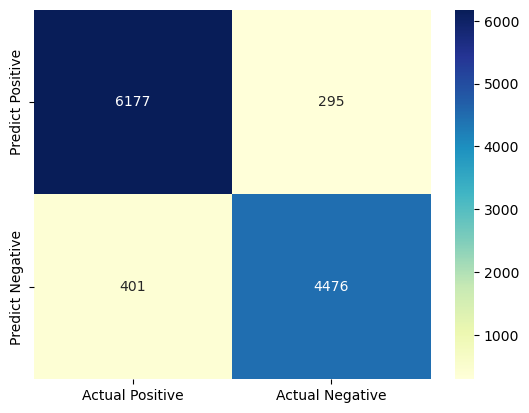

ROC-AUC Score: 0.9817125673521662


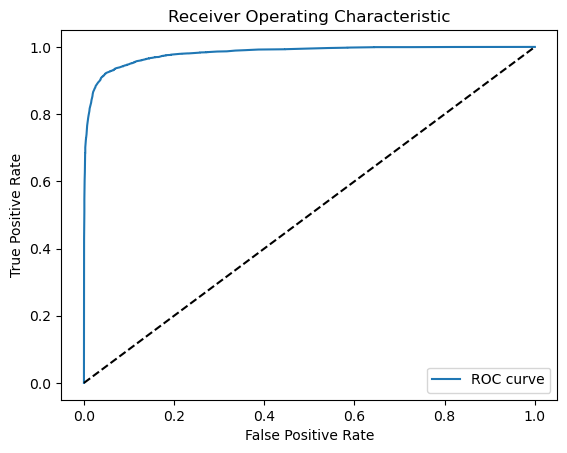

Training and Evaluating MultinomialNB
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6472
           1       0.90      0.90      0.90      4877

    accuracy                           0.91     11349
   macro avg       0.91      0.91      0.91     11349
weighted avg       0.91      0.91      0.91     11349



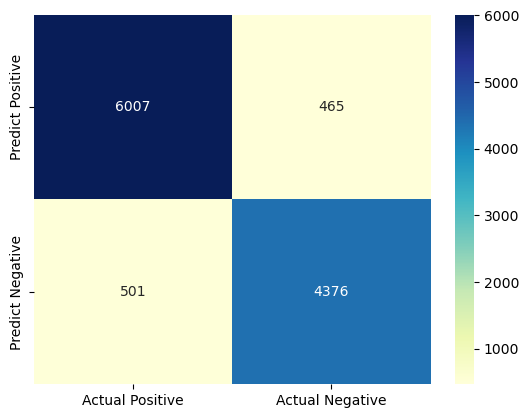

ROC-AUC Score: 0.9708606757127689


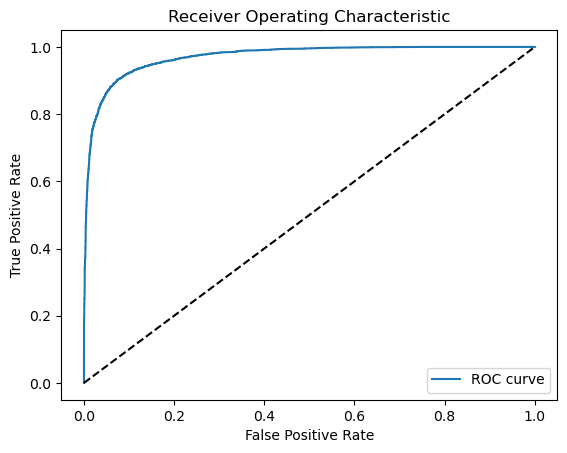

Training and Evaluating KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.99      0.75      6472
           1       0.92      0.12      0.21      4877

    accuracy                           0.62     11349
   macro avg       0.76      0.56      0.48     11349
weighted avg       0.74      0.62      0.52     11349



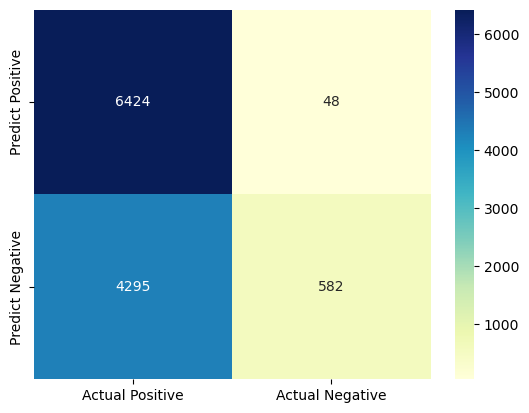

ROC-AUC Score: 0.6825642258141125


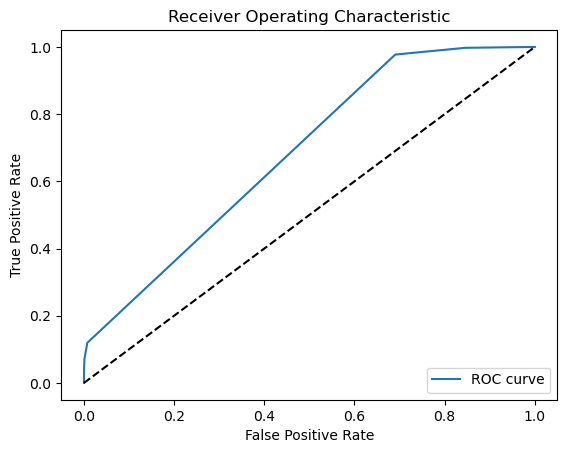

In [8]:
def train_evaluate_plot(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    
    cm=confusion_matrix(y_test, predictions)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()
    
    probs = classifier.predict_proba(X_test)[:, 1]  
    print("ROC-AUC Score:", roc_auc_score(y_test, probs))
    
    fpr, tpr, threshold = roc_curve(y_test, probs)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess curve
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

tfvectorizer = TfidfVectorizer()
tfidf_matrix = tfvectorizer.fit_transform(data['cleaned_tweet'])

# Split data into training and testing sets
X = tfidf_matrix  # Features (TF-IDF representation)
y = data['Toxicity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train, Evaluate and Plot results for each classifier
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB(), KNeighborsClassifier()]

for classifier in classifiers:
    print("Training and Evaluating", classifier.__class__.__name__)
    train_evaluate_plot(classifier, X_train, X_test, y_train, y_test)


Count Vectorizer or Bag of Words

Decision Tree classifier : accuracy - 0.93
Random Forest classifier : accuracy - 0.94
Naive Bayes mode : accuracy - 0.92
K-NN classifier : accuracy - 0.90

    
    
TF-IDF

Decision Tree classifier : accuracy - 0.93
Random Forest classifier : accuracy - 0.94
Naive Bayes mode : accuracy - 0.91
K-NN classifier : accuracy - 0.76



Count Vectorizer or Bag of Words

Decision Tree classifier : Roc-auc-score - 0.93
Random Forest classifier :Roc-auc-score  - 0.98
Naive Bayes mode : Roc-auc-score - 0.97
K-NN classifier : Roc-auc-score - 0.93

    
    
TF-IDF

Decision Tree classifier : Roc-auc-score - 0.93
Random Forest classifier : Roc-auc-score - 0.98
Naive Bayes mode : Roc-auc-score - 0.97
K-NN classifier : Roc-auc-score - 0.68
